# Практическое задание №1 по ОММ

## Вариант 27

### Выполнила студент 322 группы Салыкина Дария


## Постановка задачи

Используя схему бегущего счета и итерационные методы, решить задачу для квазилинейного уравнением переноса:
### $$
      \begin{cases}
      \frac{\partial u}{\partial t} + \frac{1}{1+u}\frac{\partial u}{\partial x} =0, 0<x\leq 1\\
      u(x,0)= \cos\frac{\pi x}{2}\\
      u(0,t)= e^{-t}
      \end{cases} 
   $$

Импорт необходимых библиотек:

In [124]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

## Характеристики уравнения

Построим характеристики. Для этого найдем их уравнение:
$$ \frac{dt}{1}=\frac{dx}{\frac{1}{1+u}}=\frac{du}{0}\\
 u = u^*=const$$
Преобразуем и проинтегрируем:
$$ \int\limits_{t_0}^t dt = \int\limits_{x_0}^x(1+u^*) dx $$
Тогда
$$ t-t_0 = (1+u^*)(x-x_0)$$
Подставим начальные и граничные условия для получения семейства кривых:

$$ 1) x_0 = 0 \Rightarrow t-t_0=x+u^*x \Rightarrow t=(1+e^{-t_0})x +t_0\\
 2) t_0 = 0 \Rightarrow u^*=\cos\frac{\pi x_0}{2} \Rightarrow t =(1+\cos\frac{\pi x_0}{2})(x-x_0) $$
 Построим характеристики:

In [125]:
def char1(x):
    return [((1+cos(0.5*pi*x0))*(x-x0)) for x0 in np.arange(0.1,1,0.1)]

def char2(x):
    return [((1+exp(-t0))*x+t0) for t0 in np.arange(0,2,0.1)]

Массив значений по х от 0 до 1:

In [126]:
x_list = np.arange(0.1,1,0.1)

char1_list = [char1(x) for x in x_list]
char2_list = [char2(x) for x in x_list]

Строим график характеристик:

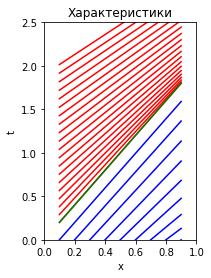

In [127]:
plt.subplot(1, 2, 1)
plt.ylim(0,2.5)
plt.xlim(0,1)
plt.plot(x_list, char1_list, color = "b") #Н.У
plt.plot(x_list, char2_list, color = "r") #Г.У
plt.title('Характеристики',loc='center')
plt.ylabel('t')
plt.xlabel('x')
t_list = np.arange(0.1, 1, 0.1)
plt.plot(t_list,t_list*2, color = "g")


plt.show()


Видно, что в нашей области характеристики не пересекаются. Поэтому именно в ней будем искать решение. Характеристика $t = 2x$ разделяет области, в которых решение определяется граничным и начальным условиями.

## Метод решения

Для решения задачи будем пользоваться методом конечных разностей.
Будем строить решение, пользуясь трёхточечной схемой. Четырёхточечная схема является безусловно устойчивой, но немонотонной, имеет порядок аппроксимации $O(\tau^2) + O(h^2)$. Трёхточечная схема является условно устойчивой, монотонной и имеет порядок аппроксимации $O(\tau) + O(h)$. 

Построим решение в области $0 < x < 1$, $t > 0$, в которой характеристики не пересекаются. Введем равномерную разностную сетку:
$$\overline{\omega_{h,\tau}} = {x_n = nh, t_j = j\tau, n=\overline{0, N-1}, j = \overline{0,M-1} }$$

Поскольку наше решение является достаточно гладким и непрерывным, данный шаблон позволяет построить консервативную разностную схему и избежать проблем с ложной сходимостью. 


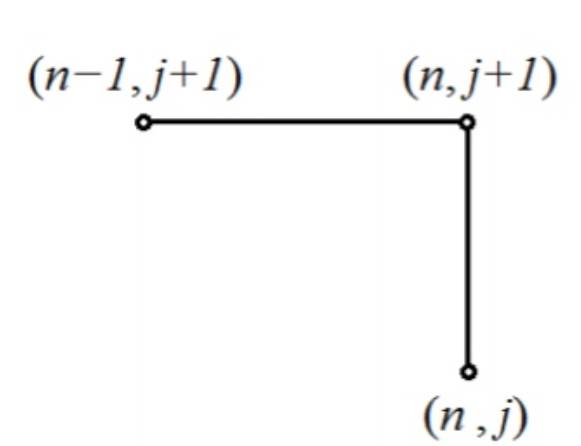

In [128]:
from IPython.display import Image
PATH = "C:/Users/ty/Pictures/Screenshots/"
Image(filename = PATH + "1.png", width=250, height=250)

Разностная задача, апроксимирующая исходную:
$$\begin{equation*}
  \begin{cases} 
  \frac{y_n^{j+1} - y_n^{j}}{\tau} + \frac{ln(y_n^{j+1} + 1) - ln(y_{n-1}^{j+1} + 1)}{h} = 0\\
  y_n^0 = \cos\frac{\pi x}{2}, n = \overline{0,N-1}\\
  y_0^j = e^{-t}, j = \overline{0,M-1}
   \end{cases}
  \end{equation*}
  $$

## Устойчивость схемы

Для анализа устойчивости разностной схемы воспользуемся спектральным методом. 
Выберем точку $(x,y) ∈ D$ и зафиксируем в ней коэффициент при ∂u/∂x: 
$$ \frac{1}{1+u} = C$$

Имеем:
$$ \frac{\partial u}{\partial t} + C\frac{\partial u}{\partial x} =0 \Rightarrow  \frac{y_n^{j+1} - y_n^{j}}{\tau} + C\frac{y_n^{j+1} - y_{n-1}^{j+1}}{h} = 0$$
где начальные условия имееют специальный вид: $y_n^0=e^{iqx_n} = e^{i\alpha n}, \alpha = qh,$
q - произвольное вещественное число.

Тогда можем получить выражение для произвольного y: $y_n^j = \lambda^je^{i\alpha n}$, где $\lambda$ - множитель роста.
После подстановки в исходное выражение получим:
$$\lambda = \frac{1}{1 + \frac{C\tau}{h}(1 - e^{-i\alpha})} $$

В нашем случае С положительная (исходя из ее вида и граничных условий на решение). Тогда спектр будет иметь следующий вид:

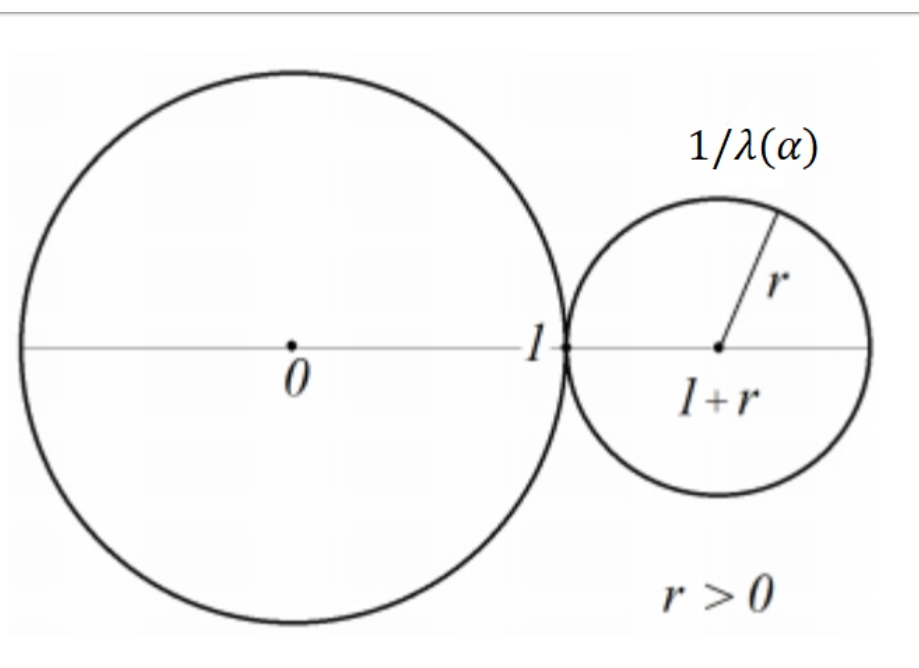

In [129]:
PATH = "C:/Users/ty/Pictures/Screenshots/"
Image(filename = PATH + "2.png", width=250, height=250)

Тогда видно, что сама лямбда лежит внутри единичной окружности и наша схема безусловно устойчива

## Программа для численного решения

Введем шаги:

In [130]:
N = 100 #количество шагов по х
M = 2000 #количество шагов по t

И запишем границы:

In [131]:
X, T = 1, 5
ε = 0.0001

In [132]:
y = np.zeros((N,M), dtype=float)
x, t = np.linspace(0, X, N), np.linspace(0, T, M) #области построения

Зададим шаг сетки:

In [133]:
h = float(X)/(N-1)
τ = float(T)/(M-1)

Поставим граничные и начальные условия:

In [134]:
y[:,0]= np.cos(np.pi*x/2)
y[0,:]= np.exp(-t)

Для удобства определим вспомогательные функции:

In [135]:
def p(x):
    return np.log(x + 1)

def Dp(x):
    return 1/(1+x)

def f(x, a, b):
    return (x-a)/τ + (p(x)-p(b))/h
    
def Df(x):
    return 1/τ + Dp(x)/h

Для решения воспользуемся методом Ньютона:

In [136]:
def solve(a, b):
    result = b #начальное приближение
    d = ε + 1 #запуск цикла
    while(d>ε):
        y = result
        result = y - f(y, a, b)/Df(y)
        d = abs(y - result)
    return result

Сделаем проход по всей сетке:

In [137]:
for i in range(1,N):
    for j in range(1,M):
        y[i,j] = solve(y[i,j-1],y[i-1,j])

## Результаты

Text(0.5, 0.92, 'Численное решение')

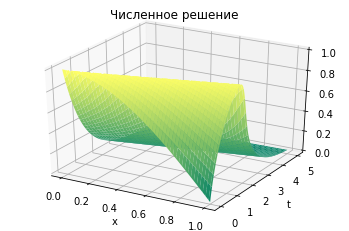

In [138]:
#3D график
fig = plt.figure()
ax = fig.gca(projection='3d')
t, x = np.meshgrid(t,x)

surf = ax.plot_surface(x,t,y,cmap='summer')
plt.ylabel('t')
plt.xlabel('x')
plt.title('Численное решение')

### Профили функции $u(x,t)$


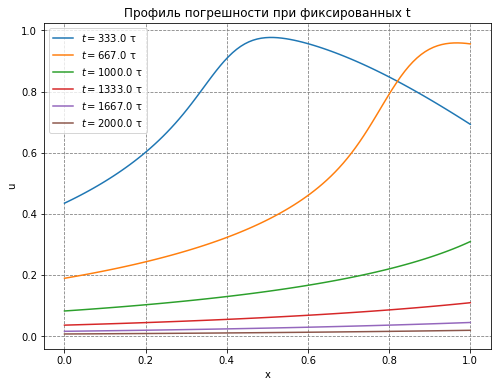

In [140]:
fig,ax=plt.subplots(figsize=(8,6))
x = np.linspace(0,1,N)
plt.xlabel('x')
plt.ylabel('u')
plt.title('Профиль погрешности при фиксированных t')

plt.plot(x, y[:,int(M/6)],label='$t=$' +str(round(M/6,0)) + ' τ')
plt.plot(x, y[:,int(2*M/6)],label='$t= $' +str(round(2*M/6,0)) + ' τ')
plt.plot(x, y[:,int(3*M/6)],label='$t= $' +str(round(3*M/6,0)) + ' τ')
plt.plot(x, y[:,int(4*M/6)],label='$t= $' +str(round(4*M/6,0)) + ' τ')
plt.plot(x, y[:,int(5*M/6)],label='$t= $' +str(round(5*M/6,0)) + ' τ')
plt.plot(x, y[:,int(6*M/6)-1],label='$t= $' +str(round(6*M/6,0)) + ' τ')
ax.grid(which='major', color = 'gray',ls='--')
ax.legend(loc='best')